In [46]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [47]:
#1
# Data exploration and preprocessing
df=pd.read_csv("/content/Mall_Customers.csv")
df.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


In [48]:
df.shape

(200, 5)

In [49]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome'}, inplace=True)
df.rename(columns={'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40
...,...,...,...,...,...
195,196,Female,35,120.0,79
196,197,Female,45,NaN,28
197,198,Male,32,126.0,74
198,199,Male,32,137.0,18


In [50]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
AnnualIncome     float64
SpendingScore      int64
dtype: object

In [51]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,190.000000,200.000000
mean,100.500000,38.850000,60.547368,50.200000
std,57.879185,13.969007,25.883241,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,42.250000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
#Checking for missing values in the dataset
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
AnnualIncome     10
SpendingScore     0
dtype: int64

In [53]:
df['AnnualIncome'].fillna(df['AnnualIncome'].mean(), inplace=True)

In [54]:
#feature engineering
df['AnnualIncome'].fillna(df['AnnualIncome'].mean(), inplace=True)
df['Income-spending-Ratio'] = df['AnnualIncome']/df['SpendingScore']
# df.drop(columns=['RatioofIncome/spending'], inplace=True,axis='columns')
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Income-spending-Ratio
0,1,Male,19,15.000000,39,0.384615
1,2,Male,21,15.000000,81,0.185185
2,3,Female,20,16.000000,6,2.666667
3,4,Female,23,16.000000,77,0.207792
4,5,Female,31,17.000000,40,0.425000
...,...,...,...,...,...,...
195,196,Female,35,120.000000,79,1.518987
196,197,Female,45,60.547368,28,2.162406
197,198,Male,32,126.000000,74,1.702703
198,199,Male,32,137.000000,18,7.611111


In [55]:
#checking if any missing values
df.isnull().sum()

CustomerID               0
Gender                   0
Age                      0
AnnualIncome             0
SpendingScore            0
Income-spending-Ratio    0
dtype: int64

In [56]:
df.duplicated().sum()

0

<Axes: >

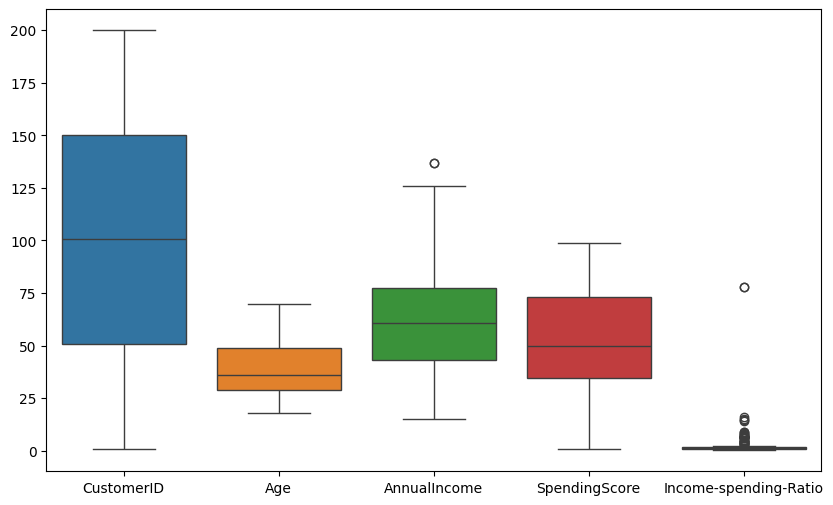

In [57]:
#Checking outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [59]:
q1  =df.quantile(0.25)
q3  =df.quantile(0.75)
iqr  = q3-q1
outlier  = ((df<(q1-iqr*1.5)) | (df>(q3+iqr*1.5))).any(axis=1)
df = df[~outlier]
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Income-spending-Ratio
0,1,1,19,15.000000,39,0.384615
1,2,1,21,15.000000,81,0.185185
3,4,0,23,16.000000,77,0.207792
4,5,0,31,17.000000,40,0.425000
5,6,0,22,17.000000,76,0.223684
...,...,...,...,...,...,...
191,192,0,32,103.000000,69,1.492754
193,194,0,38,113.000000,91,1.241758
195,196,0,35,120.000000,79,1.518987
196,197,0,45,60.547368,28,2.162406


In [60]:
#2
#Elbow Method for Finding the optimal number of clusters
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 2:])
selected_features = scaled_features


optimal number of clusters using techniques like the elbow method and then apply k-mean clustering algorithm

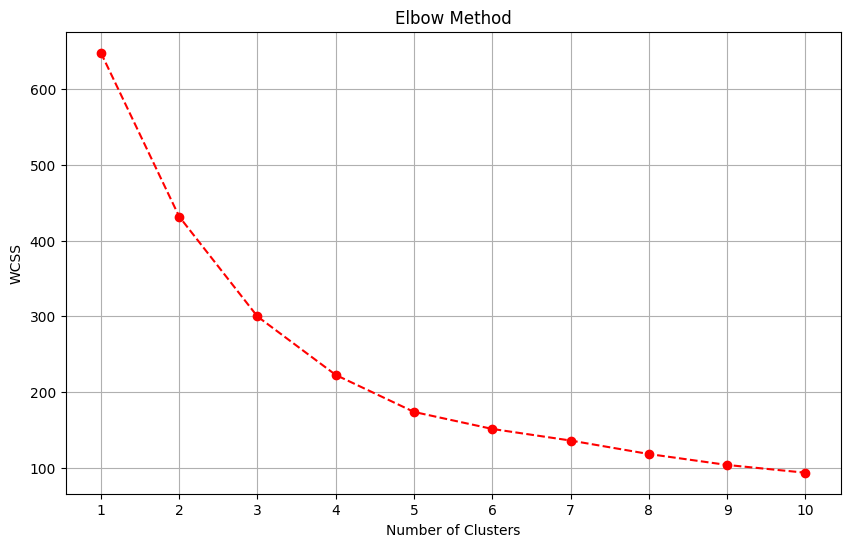

In [61]:

from sklearn.cluster import KMeans
w_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    w_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), w_list, marker='o', linestyle='--',c="red")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

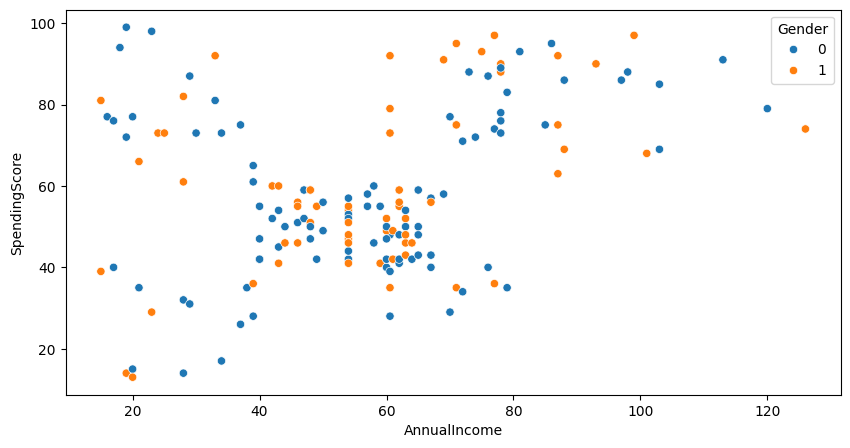

In [62]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="AnnualIncome",y="SpendingScore",hue="Gender")
plt.show()

 Apply K-means clustering

In [63]:
#3
from sklearn.cluster import KMeans

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(selected_features)

In [64]:
kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 1, 2, 4, 4, 0, 4, 1, 4, 4, 1, 4,
       0, 4, 0, 4, 4, 4, 4, 1, 4, 1, 4, 0, 2, 0, 4, 0, 4, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0,
       0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 1, 3,
       3, 0, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 1, 3, 3, 3, 0,
       0, 1, 0, 3, 1, 3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2], dtype=int32)

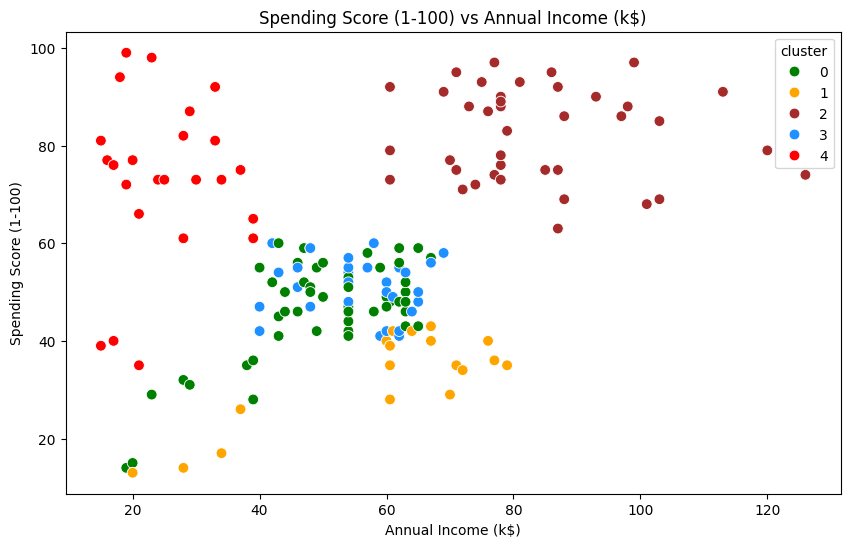

In [67]:
#4
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'AnnualIncome',y = 'SpendingScore',hue="cluster",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

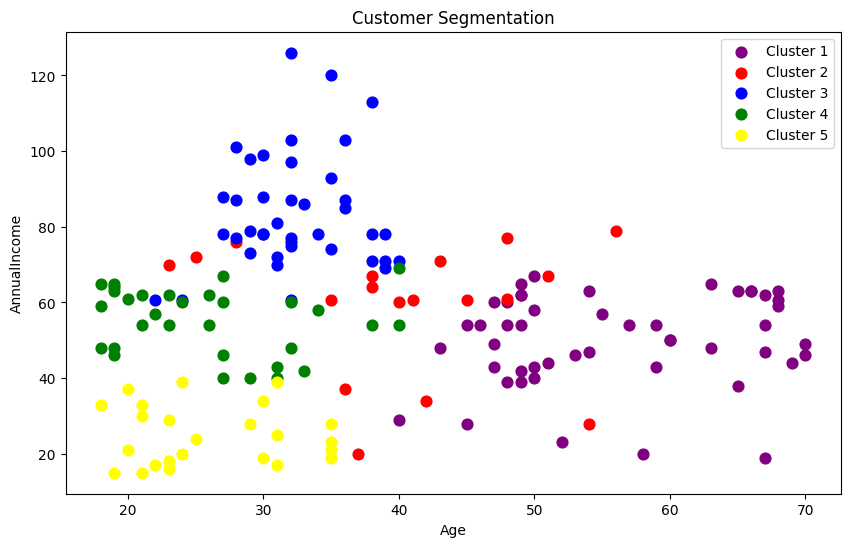

Targerted Strategise
On seeing the cluster it is clear that one who earns more spends more ,therefore target the people who earns more


In [69]:
#5
plt.figure(figsize=(10, 6))
colors = ['purple', 'red', 'blue', 'green', 'yellow']
for i in range(5):
    plt.scatter(df["Age"][df.cluster == i], df["AnnualIncome"][df.cluster == i], c=colors[i], label=f'Cluster {i+1}', s=60)
plt.xlabel("Age")
plt.ylabel("AnnualIncome")
plt.title('Customer Segmentation')
plt.legend()
plt.show()

print("Targerted Strategise")
print("On seeing the cluster it is clear that one who earns more spends more ,therefore target the people who earns more")

In [74]:
# sns.boxplot(data=df, x="AnnualIncome", y="SpendingScore")
print("Targerted Strategise")
print("On seeing the cluster it is clear that one who earns more spends more ,therefore target the people who earns more")

Targerted Strategise
On seeing the cluster it is clear that one who earns more spends more ,therefore target the people who earns more
